<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/Ensemble-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


### Random Forest Classifier

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/Machine-learning-main/assets/jobs.csv")

df.head()

,Student,Consulted_Person,Reason for Course Choice,Job_Opportunities,Course_Fee
0,Adam,Cousin,Interest in the subject,Good,High
1,Adam,Teacher,Good career prospects,Excellent,High
2,Adam,Parent,Family tradition,Good,Medium
3,Adam,Degree Student,High salary potential,Good,High
4,Adam,Working Professional,Personal experience,Good,High


<Axes: >

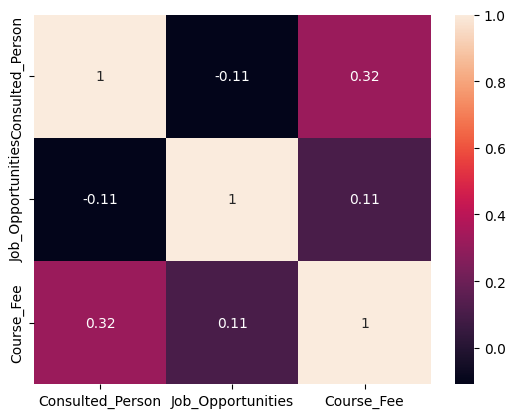

In [10]:
df['Course_Fee'] = df['Course_Fee'].fillna('Unknown')

le = LabelEncoder()
df['Consulted_Person'] = le.fit_transform(df['Consulted_Person'])
df['Course_Fee'] = le.fit_transform(df['Course_Fee'])
df['Job_Opportunities'] = le.fit_transform(df['Job_Opportunities'])

import seaborn as sns

df = df.drop("Student", axis = 1)
df = df.drop("Reason for Course Choice", axis = 1)

sns.heatmap(df.corr(), annot=True)

In [11]:
X = df[['Consulted_Person', 'Job_Opportunities']]
y = df['Course_Fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


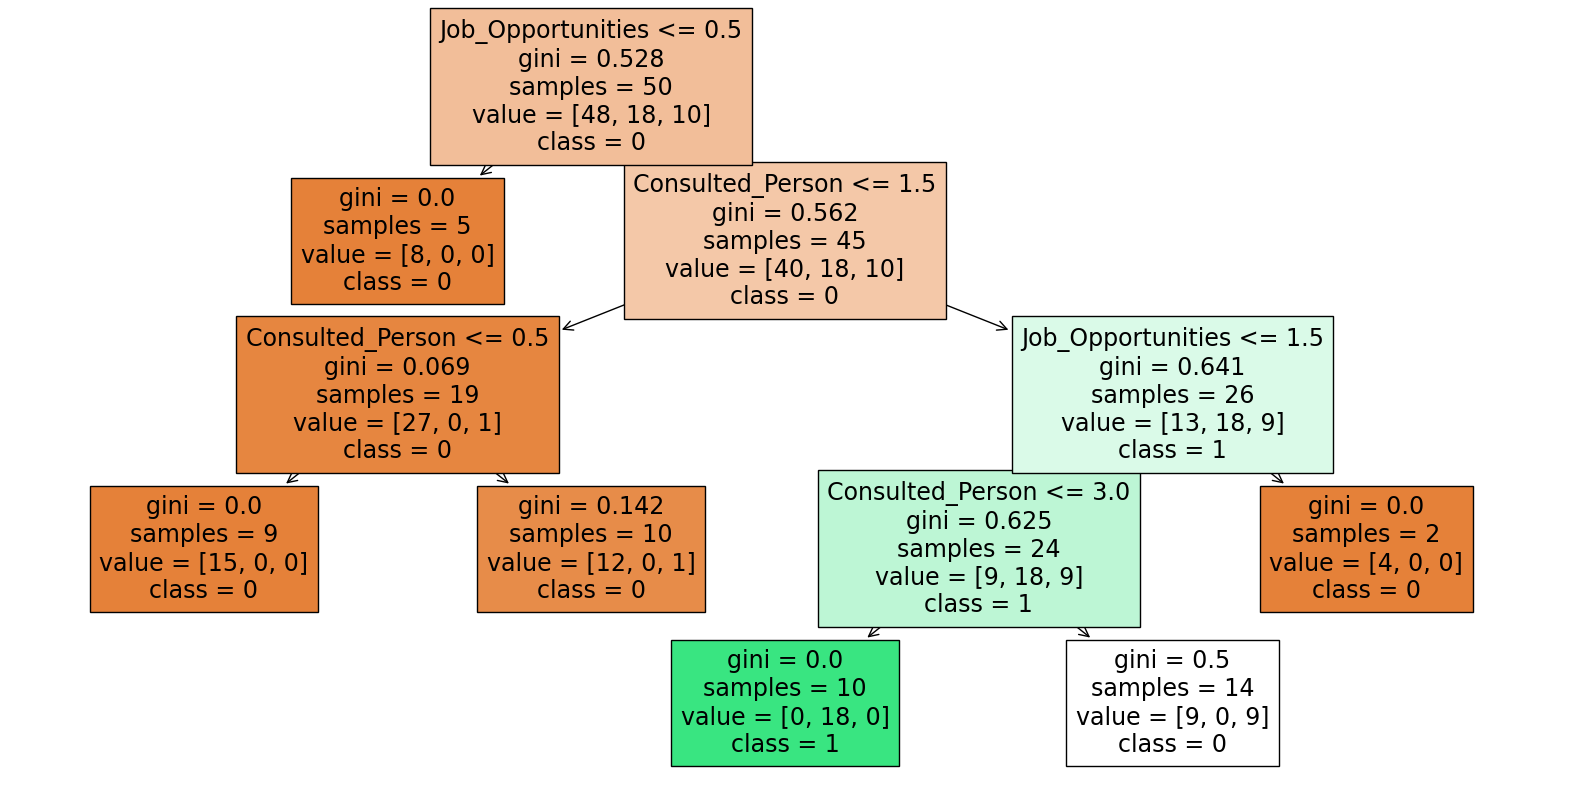

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

class_names = df['Course_Fee'].unique().astype(str)

plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

## AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Adaboost Classifier Accuracy:", accuracy_adaboost)

Adaboost Classifier Accuracy: 0.9


## xGBoost

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.9
